<h1 align=center> Customer Churn Prediction </h1>

#### samples of past subscriptions of a video streaming platform that contain information about the customer, the customers streaming preferences, and their activity in the subscription thus far.

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df1 = pd.read_csv('./train.csv')
df1.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


In [4]:
pd.set_option('display.max_columns',30)
df1.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,63.531377,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,25.725595,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,57.364061,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,131.537507,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,45.356653,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


In [5]:
df1.columns

Index(['AccountAge', 'MonthlyCharges', 'TotalCharges', 'SubscriptionType',
       'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess',
       'DeviceRegistered', 'ViewingHoursPerWeek', 'AverageViewingDuration',
       'ContentDownloadsPerMonth', 'GenrePreference', 'UserRating',
       'SupportTicketsPerMonth', 'Gender', 'WatchlistSize', 'ParentalControl',
       'SubtitlesEnabled', 'CustomerID', 'Churn'],
      dtype='object')

In [6]:
df1.drop(columns='CustomerID',inplace=True)

In [7]:
df1

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,63.531377,10,Sci-Fi,2.176498,4,Male,3,No,No,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,25.725595,18,Action,3.478632,8,Male,23,No,Yes,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,57.364061,23,Fantasy,4.238824,6,Male,1,Yes,Yes,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,131.537507,30,Drama,4.276013,2,Male,24,Yes,Yes,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,45.356653,20,Comedy,3.616170,4,Female,0,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243782,77,9.639902,742.272460,Basic,Mailed check,No,Movies,No,Computer,13.502729,80.367312,47,Sci-Fi,3.697451,1,Male,8,Yes,No,0
243783,117,13.049257,1526.763053,Premium,Credit card,No,TV Shows,Yes,TV,24.963291,59.818441,35,Comedy,1.449742,4,Male,20,No,No,0
243784,113,14.514569,1640.146267,Premium,Credit card,Yes,TV Shows,No,TV,10.628728,176.186095,44,Action,4.012217,6,Male,13,Yes,Yes,0
243785,7,18.140555,126.983887,Premium,Bank transfer,Yes,TV Shows,No,TV,30.466782,153.386315,36,Fantasy,2.135789,7,Female,5,No,Yes,0


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AccountAge                243787 non-null  int64  
 1   MonthlyCharges            243787 non-null  float64
 2   TotalCharges              243787 non-null  float64
 3   SubscriptionType          243787 non-null  object 
 4   PaymentMethod             243787 non-null  object 
 5   PaperlessBilling          243787 non-null  object 
 6   ContentType               243787 non-null  object 
 7   MultiDeviceAccess         243787 non-null  object 
 8   DeviceRegistered          243787 non-null  object 
 9   ViewingHoursPerWeek       243787 non-null  float64
 10  AverageViewingDuration    243787 non-null  float64
 11  ContentDownloadsPerMonth  243787 non-null  int64  
 12  GenrePreference           243787 non-null  object 
 13  UserRating                243787 non-null  f

In [11]:
df1.isnull().sum()

AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
ParentalControl             0
SubtitlesEnabled            0
Churn                       0
dtype: int64

In [12]:
df1.duplicated().sum()

0

In [13]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [14]:
le = LabelEncoder()

In [15]:
for column in df1.columns:
    if df1[column].dtype != 'float':
        df1[column]=le.fit_transform(df1[column]).astype(float)

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AccountAge                243787 non-null  float64
 1   MonthlyCharges            243787 non-null  float64
 2   TotalCharges              243787 non-null  float64
 3   SubscriptionType          243787 non-null  float64
 4   PaymentMethod             243787 non-null  float64
 5   PaperlessBilling          243787 non-null  float64
 6   ContentType               243787 non-null  float64
 7   MultiDeviceAccess         243787 non-null  float64
 8   DeviceRegistered          243787 non-null  float64
 9   ViewingHoursPerWeek       243787 non-null  float64
 10  AverageViewingDuration    243787 non-null  float64
 11  ContentDownloadsPerMonth  243787 non-null  float64
 12  GenrePreference           243787 non-null  float64
 13  UserRating                243787 non-null  f

In [17]:
df2 = pd.read_csv('./test.csv')
df2.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID
0,38,17.869374,679.036195,Premium,Mailed check,No,TV Shows,No,TV,29.126308,122.274031,42,Comedy,3.522724,2,Male,23,No,No,O1W6BHP6RM
1,77,9.912854,763.289768,Basic,Electronic check,Yes,TV Shows,No,TV,36.873729,57.093319,43,Action,2.021545,2,Female,22,Yes,No,LFR4X92X8H
2,5,15.019011,75.095057,Standard,Bank transfer,No,TV Shows,Yes,Computer,7.601729,140.414001,14,Sci-Fi,4.806126,2,Female,22,No,Yes,QM5GBIYODA
3,88,15.357406,1351.451692,Standard,Electronic check,No,Both,Yes,Tablet,35.586430,177.002419,14,Comedy,4.943900,0,Female,23,Yes,Yes,D9RXTK2K9F
4,91,12.406033,1128.949004,Standard,Credit card,Yes,TV Shows,Yes,Tablet,23.503651,70.308376,6,Drama,2.846880,6,Female,0,No,No,ENTCCHR1LR


In [18]:
df2.drop(columns='CustomerID',inplace=True)

In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104480 entries, 0 to 104479
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AccountAge                104480 non-null  int64  
 1   MonthlyCharges            104480 non-null  float64
 2   TotalCharges              104480 non-null  float64
 3   SubscriptionType          104480 non-null  object 
 4   PaymentMethod             104480 non-null  object 
 5   PaperlessBilling          104480 non-null  object 
 6   ContentType               104480 non-null  object 
 7   MultiDeviceAccess         104480 non-null  object 
 8   DeviceRegistered          104480 non-null  object 
 9   ViewingHoursPerWeek       104480 non-null  float64
 10  AverageViewingDuration    104480 non-null  float64
 11  ContentDownloadsPerMonth  104480 non-null  int64  
 12  GenrePreference           104480 non-null  object 
 13  UserRating                104480 non-null  f

In [20]:
df2.isnull().sum()

AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
ParentalControl             0
SubtitlesEnabled            0
dtype: int64

In [21]:
for column in df2.columns:
    if df2[column].dtype!='float':
        df2[column]=le.fit_transform(df2[column]).astype(float)

In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104480 entries, 0 to 104479
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AccountAge                104480 non-null  float64
 1   MonthlyCharges            104480 non-null  float64
 2   TotalCharges              104480 non-null  float64
 3   SubscriptionType          104480 non-null  float64
 4   PaymentMethod             104480 non-null  float64
 5   PaperlessBilling          104480 non-null  float64
 6   ContentType               104480 non-null  float64
 7   MultiDeviceAccess         104480 non-null  float64
 8   DeviceRegistered          104480 non-null  float64
 9   ViewingHoursPerWeek       104480 non-null  float64
 10  AverageViewingDuration    104480 non-null  float64
 11  ContentDownloadsPerMonth  104480 non-null  float64
 12  GenrePreference           104480 non-null  float64
 13  UserRating                104480 non-null  f

In [23]:
df1

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,Churn
0,19.0,11.055215,221.104302,1.0,3.0,0.0,0.0,0.0,1.0,36.758104,63.531377,10.0,4.0,2.176498,4.0,1.0,3.0,0.0,0.0,0.0
1,56.0,5.175208,294.986882,0.0,1.0,1.0,1.0,0.0,3.0,32.450568,25.725595,18.0,0.0,3.478632,8.0,1.0,23.0,0.0,1.0,0.0
2,72.0,12.106657,883.785952,0.0,3.0,1.0,1.0,0.0,0.0,7.395160,57.364061,23.0,3.0,4.238824,6.0,1.0,1.0,1.0,1.0,0.0
3,31.0,7.263743,232.439774,0.0,2.0,0.0,2.0,0.0,3.0,27.960389,131.537507,30.0,2.0,4.276013,2.0,1.0,24.0,1.0,1.0,0.0
4,56.0,16.953078,966.325422,1.0,2.0,1.0,2.0,0.0,2.0,20.083397,45.356653,20.0,1.0,3.616170,4.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243782,76.0,9.639902,742.272460,0.0,3.0,0.0,1.0,0.0,0.0,13.502729,80.367312,47.0,4.0,3.697451,1.0,1.0,8.0,1.0,0.0,0.0
243783,116.0,13.049257,1526.763053,1.0,1.0,0.0,2.0,1.0,2.0,24.963291,59.818441,35.0,1.0,1.449742,4.0,1.0,20.0,0.0,0.0,0.0
243784,112.0,14.514569,1640.146267,1.0,1.0,1.0,2.0,0.0,2.0,10.628728,176.186095,44.0,0.0,4.012217,6.0,1.0,13.0,1.0,1.0,0.0
243785,6.0,18.140555,126.983887,1.0,0.0,1.0,2.0,0.0,2.0,30.466782,153.386315,36.0,3.0,2.135789,7.0,0.0,5.0,0.0,1.0,0.0


In [24]:
X = df1.iloc[:,:-1].values
y = df1.iloc[:,-1].values

In [27]:
sc= StandardScaler()

In [29]:
X = sc.fit_transform(X)

In [30]:
from sklearn.decomposition import PCA

In [31]:
pca_model = PCA().fit(X)

In [32]:
pca_model.explained_variance_ratio_

array([0.10318583, 0.05330179, 0.05320227, 0.05310268, 0.05301599,
       0.05290595, 0.05286321, 0.05278055, 0.05271593, 0.05264247,
       0.05260356, 0.05241711, 0.05234392, 0.05230345, 0.0522387 ,
       0.05216864, 0.05204353, 0.0519989 , 0.00216551])

In [33]:
pca_model.explained_variance_ratio_.cumsum()

array([0.10318583, 0.15648762, 0.20968989, 0.26279257, 0.31580857,
       0.36871451, 0.42157772, 0.47435827, 0.5270742 , 0.57971668,
       0.63232024, 0.68473735, 0.73708126, 0.78938472, 0.84162342,
       0.89379207, 0.94583559, 0.99783449, 1.        ])

In [34]:
pca_model.singular_values_

array([691.34067212, 496.8816723 , 496.41757943, 495.95273831,
       495.5477592 , 495.03318686, 494.83319377, 494.44617976,
       494.14343068, 493.79901133, 493.61646974, 492.74089555,
       492.39675837, 492.20640015, 491.90163748, 491.57166605,
       490.98183499, 490.77130921, 100.15248305])

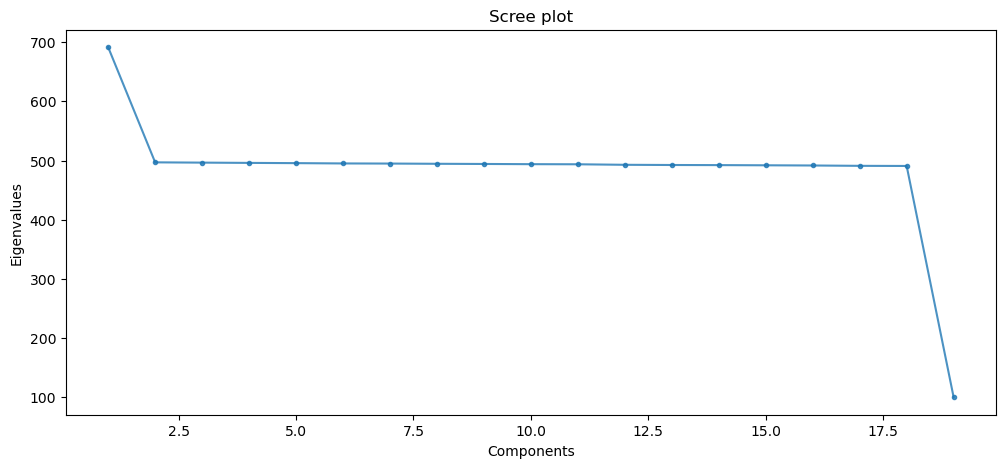

In [35]:
# Scree plot
plt.figure(figsize=(12,5))
plt.plot(range(1,len(pca_model.singular_values_)+1),pca_model.singular_values_, marker='.',alpha=0.8)
y_label = plt.ylabel("Eigenvalues")
x_label = plt.xlabel("Components")
plt.title("Scree plot")
plt.show()

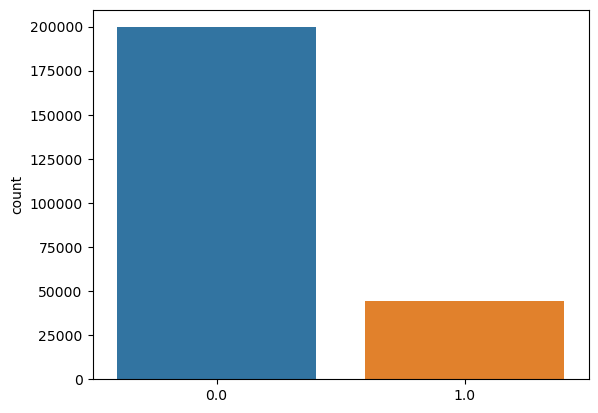

In [26]:
sns.countplot(x=y)
plt.show()